## EMPLOYEE ATTRITION

Objective: To uncover the factors that cause employees to leave the organization. To calculate the churn rate of the employees for an organization. To find out insights on what precautions the organization should take to avoid negative effect of attrition.

Data contains differnet attributes of an employee and the target variable Atrition. EmployeeNumber is the primary key. We use this dataset to predict employee churn.

# 1. Loading Libraries

In [151]:
#Importing the essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report,roc_curve,auc
from io import StringIO
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import resample
import warnings
warnings.filterwarnings('ignore')

In [152]:
#!pip install plotly
#!pip install graphviz
#conda install python-graphviz

# 2. Loading and Describing the Data 

In [153]:
#Importing the data set
data=pd.read_csv("Attrition.csv")

In [154]:
#Viewing the data set 
data.head(10)

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   
5   32        No  Travel_Frequently       1005  Research & Development   
6   59        No      Travel_Rarely       1324  Research & Development   
7   30        No      Travel_Rarely       1358  Research & Development   
8   38        No  Travel_Frequently        216  Research & Development   
9   36        No      Travel_Rarely       1299  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   
5                 2          2  Life Sciences              1               8   
6                 3          3        Medical              1              10   
7                24          1  Life Sciences              1              11   
8                23          3  Life Sciences              1              12   
9                27          3        Medical              1              13   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   
5  ...                         3            80                 0   
6  ...                         1            80                 3   
7  ...                         2            80                 1   
8  ...                         2            80                 0   
9  ...                         2            80                 2   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   
5                  8                      2               2               7   
6                 12                      3               2               1   
7                  1                      2               3               1   
8                 10                      2               3               9   
9                 17                      3               2               7   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  
5                  7                        3                     6  
6                  0                        0                     0  
7                  0                        0                     0  
8                  7                        1             

In [155]:
#To get the stastical understanding about the data
data.describe()

Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335                 1.093082    20.329428        0.711561   
min          1.000000                 1.000000    30.000000        1.000000   
25%        491.250000                 2.000000    48.000000        2.000000   
50%       1020.500000                 3.000000    66.000000        3.000000   
75%       1555.750000                 4.000000    83.750000        3.000000   
max       2068.000000                 4.000000   100.000000        4.000000   

          JobLevel  ...  RelationshipSatisfaction  StandardHours  \
count  1470.000000  ...               1470.000000         1470.0   
mean      2.063946  ...                  2.712245           80.0   
std       1.106940  ...                  1.081209            0.0   
min       1.000000  ...                  1.000000           80.0   
25%       1.000000  ...                  2.000000           80.0   
50%       2.000000  ...                  3.000000           80.0   
75%       3.000000  ...                  4.000000           80.0   
max       5.000000  ...                  4.000000           80.0   

       StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
count       1470.000000        1470.000000            1470.000000   
mean           0.793878          11.279592               2.799320   
std            0.852077           7.780782               1.289271   
min            0.000000           0.000000               0.000000   
25%            0.000000           6.000000               2.000000   
50%            1.000000          10.000000               3.000000   
75%            1.000000          15.000000               3.000000   
max            3.000000          40.000000               6.000000   

       WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
count      1470.000000     1470.000000         1470.000000   
mean          2.761224        7.008163            4.229252   
std           0.706476        6.126525            3.623137   
min           1.000000        0.000000            0.000000   
25%           2.000000        3.000000            2.000000   
50%           3.000000        5.000000            3.000000   
75%           3.000000        9.000000            7.000000   
max           4.000000       40.000000           18.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  
count              1470.000000           1470.000000  
mean                  2.187755              4.123129  
std                   3.222430              3.568136  
min                   0.000000              0.000000  
25%                   0.000000              2.000000  
50%                   1.000000              3.000000  
75%                   3.000000              7.000000  
max                  15.000000             17.000000  

[8 rows x 26 columns]

In [156]:
#To get to know about the number of rowas and columns of the data set
data.shape

(1470, 35)

# 3. Checking for any missing values

In [157]:
#To find out is there any null values ib the data set 
data.isna().any()

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

In [158]:
#To get to know the data types of the variables
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

Clearly the data set does not contains any missing values.

# 4. Exploratory Data Analysis

# (a) Numerical Variables

In [159]:
#Finding out the correlation between the numerical variables
data.corr()

Age  DailyRate  DistanceFromHome  Education  \
Age                       1.000000   0.010661         -0.001686   0.208034   
DailyRate                 0.010661   1.000000         -0.004985  -0.016806   
DistanceFromHome         -0.001686  -0.004985          1.000000   0.021042   
Education                 0.208034  -0.016806          0.021042   1.000000   
EmployeeCount                  NaN        NaN               NaN        NaN   
EmployeeNumber           -0.010145  -0.050990          0.032916   0.042070   
EnvironmentSatisfaction   0.010146   0.018355         -0.016075  -0.027128   
HourlyRate                0.024287   0.023381          0.031131   0.016775   
JobInvolvement            0.029820   0.046135          0.008783   0.042438   
JobLevel                  0.509604   0.002966          0.005303   0.101589   
JobSatisfaction          -0.004892   0.030571         -0.003669  -0.011296   
MonthlyIncome             0.497855   0.007707         -0.017014   0.094961   
MonthlyRate               0.028051  -0.032182          0.027473  -0.026084   
NumCompaniesWorked        0.299635   0.038153         -0.029251   0.126317   
PercentSalaryHike         0.003634   0.022704          0.040235  -0.011111   
PerformanceRating         0.001904   0.000473          0.027110  -0.024539   
RelationshipSatisfaction  0.053535   0.007846          0.006557  -0.009118   
StandardHours                  NaN        NaN               NaN        NaN   
StockOptionLevel          0.037510   0.042143          0.044872   0.018422   
TotalWorkingYears         0.680381   0.014515          0.004628   0.148280   
TrainingTimesLastYear    -0.019621   0.002453         -0.036942  -0.025100   
WorkLifeBalance          -0.021490  -0.037848         -0.026556   0.009819   
YearsAtCompany            0.311309  -0.034055          0.009508   0.069114   
YearsInCurrentRole        0.212901   0.009932          0.018845   0.060236   
YearsSinceLastPromotion   0.216513  -0.033229          0.010029   0.054254   
YearsWithCurrManager      0.202089  -0.026363          0.014406   0.069065   

                          EmployeeCount  EmployeeNumber  \
Age                                 NaN       -0.010145   
DailyRate                           NaN       -0.050990   
DistanceFromHome                    NaN        0.032916   
Education                           NaN        0.042070   
EmployeeCount                       NaN             NaN   
EmployeeNumber                      NaN        1.000000   
EnvironmentSatisfaction             NaN        0.017621   
HourlyRate                          NaN        0.035179   
JobInvolvement                      NaN       -0.006888   
JobLevel                            NaN       -0.018519   
JobSatisfaction                     NaN       -0.046247   
MonthlyIncome                       NaN       -0.014829   
MonthlyRate                         NaN        0.012648   
NumCompaniesWorked                  NaN       -0.001251   
PercentSalaryHike                   NaN       -0.012944   
PerformanceRating                   NaN       -0.020359   
RelationshipSatisfaction            NaN       -0.069861   
StandardHours                       NaN             NaN   
StockOptionLevel                    NaN        0.062227   
TotalWorkingYears                   NaN       -0.014365   
TrainingTimesLastYear               NaN        0.023603   
WorkLifeBalance                     NaN        0.010309   
YearsAtCompany                      NaN       -0.011240   
YearsInCurrentRole                  NaN       -0.008416   
YearsSinceLastPromotion             NaN       -0.009019   
YearsWithCurrManager                NaN       -0.009197   

                          EnvironmentSatisfaction  HourlyRate  JobInvolvement  \
Age                                      0.010146    0.024287        0.029820   
DailyRate                                0.018355    0.023381        0.046135   
DistanceFromHome                        -0.016075    0.031131        0.008783   
Educat

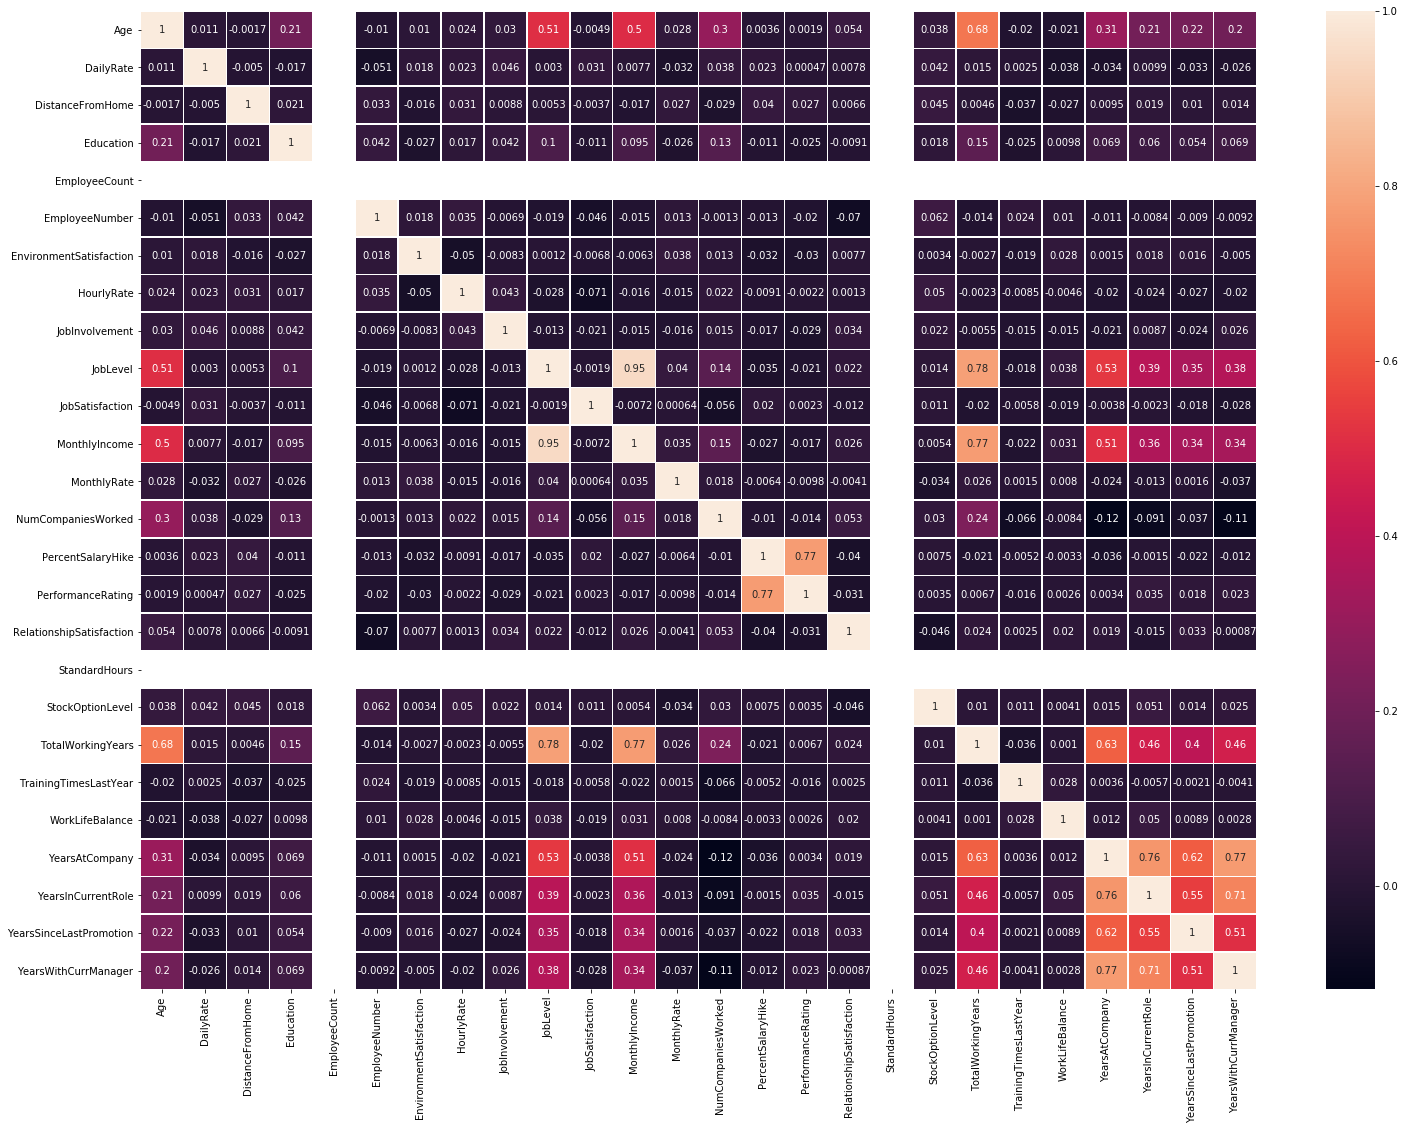

In [160]:
#Plotting a heatmap of correlation of the numerical variables
plt.figure(figsize=(25,18))
sns.heatmap(data.corr(), annot=True, linewidths=.5)

Clearly Employee count and Standard Hours are not at all related,so those can be dropped. 
There are some good correlations (>=0.5) between Age:JobLevel(0.51), Age:MonthlyIncome(0.5), 
Age:TotalWorkingYears(0.68), JobLevel:MonthlyIncome(0.95), 
JobLevel:TotalWorkingYears(0.78), JobLevel:YearsAtCompany(0.53), 
MonthlyIncome:TotalWorkingYears(0.77), MonthlyIncome:YearsAtCompany(0.51), 
PercentSalaryHike:PerformanceRating(0.77), YearsAtCompany:TotalWorkingYears(0.63), 
YearsIncurrentRole:YearsAtCompany(0.76), YearsSinceLastPromotion:YearsAtCompany(0.62), YearsWithCurrManager:YearsAtCompany(0.77), YearsSinceLastPromotion:YearsInCurrentRole(0.55), YearsWithCurrManager:YearsSinceLastPromotion(0.51)

From the correlation plots, we can see that quite a lot of our columns seem to be poorly correlated with one another. Generally when making a predictive model, it would be preferable to train a model with features that are not too correlated with one another so that we do not need to deal with redundant features. 

# (b) Categorical Variables

In [161]:
#Count of the Target Variable
data["Attrition"].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [162]:
# Reassign target
data.Attrition.replace(to_replace = dict(Yes = 1, No = 0), inplace = True)

In [163]:
attrition = data[(data['Attrition'] != 0)]
no_attrition = data[(data['Attrition'] == 0)]

#------------COUNT-----------------------
trace = go.Bar(x = (len(attrition), len(no_attrition)), y = ['Yes_attrition', 'No_attrition'], orientation = 'h', opacity = 0.8, marker=dict(
        color=['gold', 'lightskyblue'],
        line=dict(color='#000000',width=1.5)))

layout = dict(title =  'Count of attrition variable')
                    
fig = dict(data = [trace], layout=layout)
py.iplot(fig)

#------------PERCENTAGE-------------------
trace = go.Pie(labels = ['No_attrition', 'Yes_attrition'], values = data['Attrition'].value_counts(), 
               textfont=dict(size=15), opacity = 0.8,
               marker=dict(colors=['lightskyblue','gold'], 
                           line=dict(color='#000000', width=1.5)))


layout = dict(title =  'Distribution of attrition variable')
           
fig = dict(data = [trace], layout=layout)
py.iplot(fig)

Text(0.5, 1.0, 'OverTime')

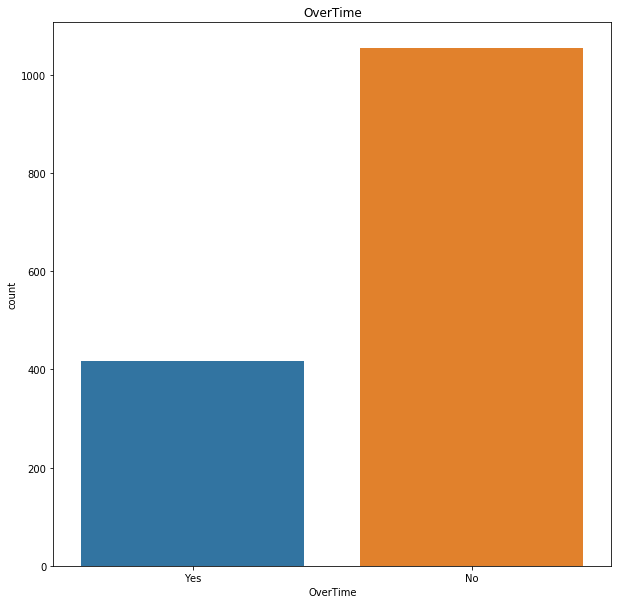

In [164]:
sns.countplot(data['OverTime'])
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('OverTime')

Text(0.5, 1.0, 'Marital Status')

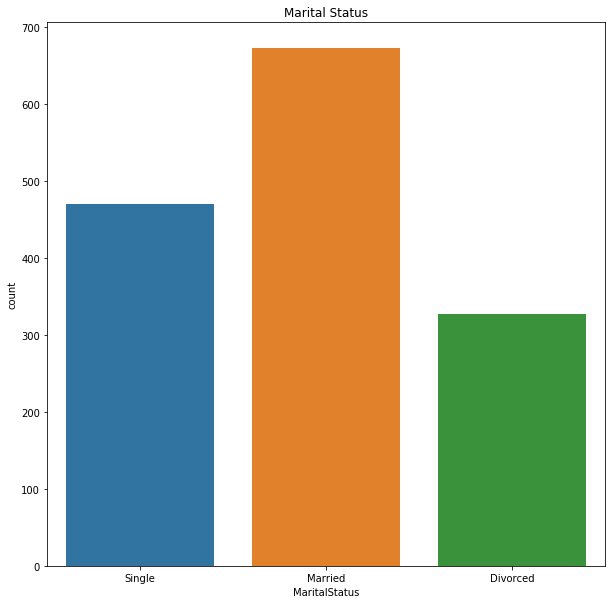

In [165]:
sns.countplot(data['MaritalStatus'])
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Marital Status')

Text(0.5, 1.0, 'Job Role')

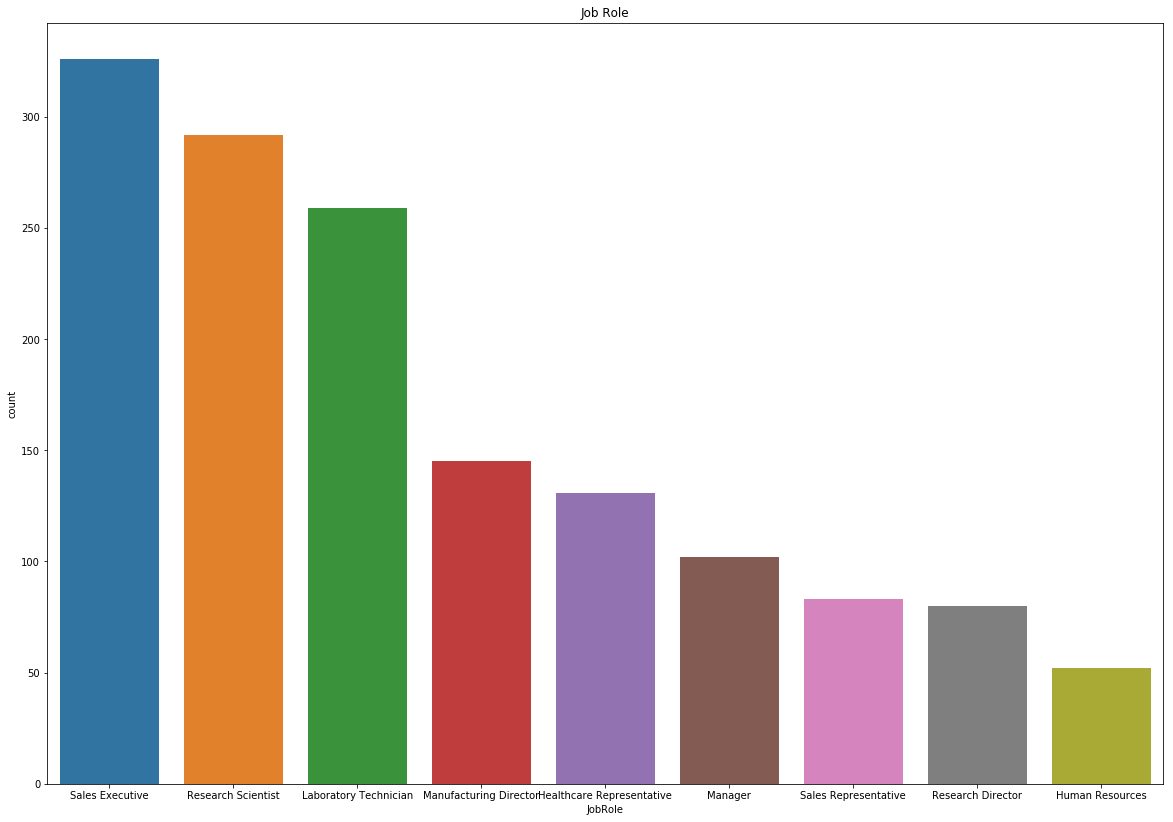

In [166]:
sns.countplot(data['JobRole'])
fig = plt.gcf()
fig.set_size_inches(20,14)
plt.title('Job Role')

Text(0.5, 1.0, 'Gender')

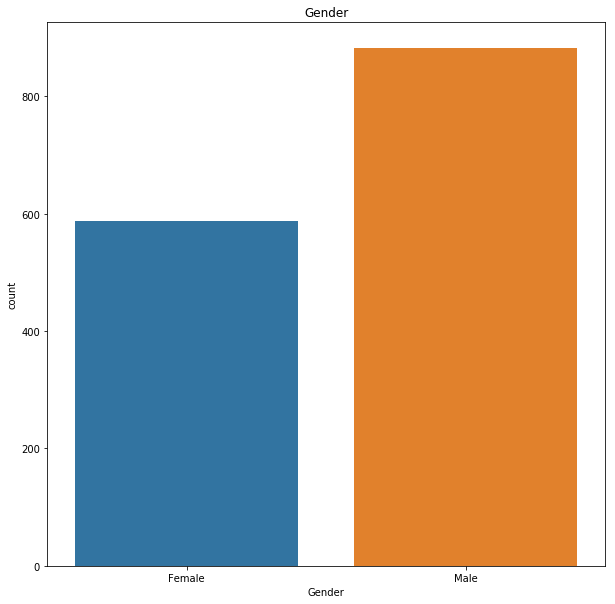

In [167]:
sns.countplot(data['Gender'])
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Gender')

Text(0.5, 1.0, 'Education Field')

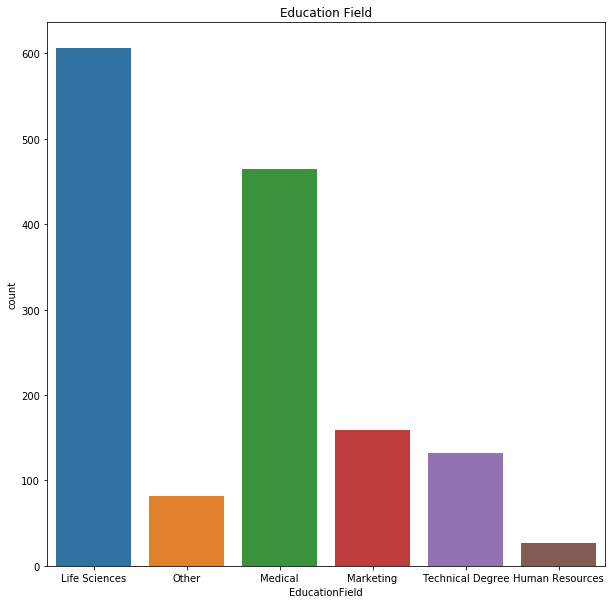

In [168]:
sns.countplot(data['EducationField'])
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Education Field')

Text(0.5, 1.0, 'Department')

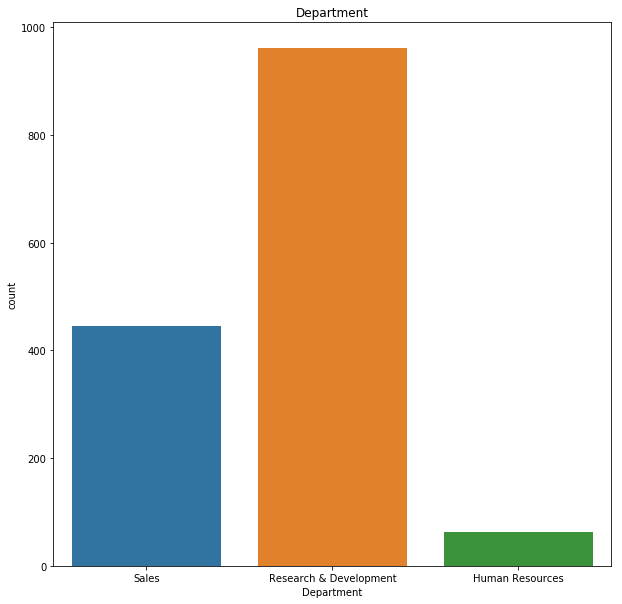

In [169]:
sns.countplot(data['Department'])
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Department')

Text(0.5, 1.0, 'Business travel')

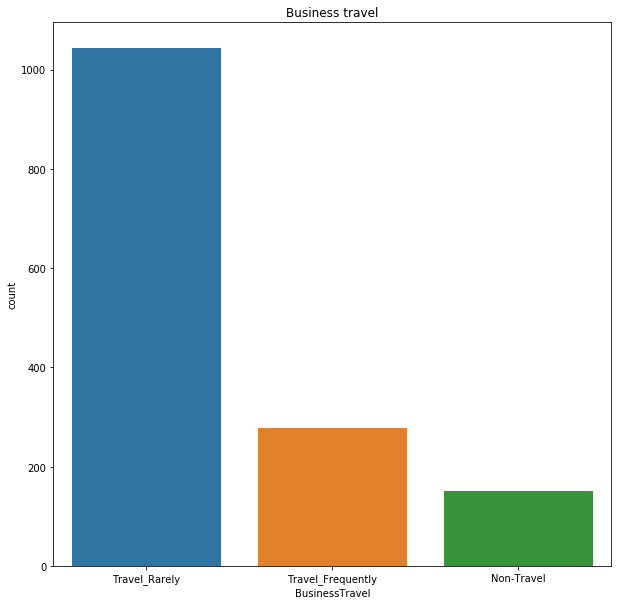

In [170]:
sns.countplot(data['BusinessTravel'])
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Business travel')

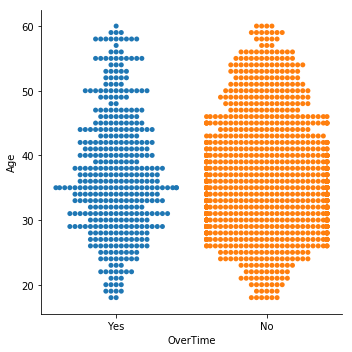

In [171]:
sns.catplot(x="OverTime", y="Age", kind="swarm", data=data);

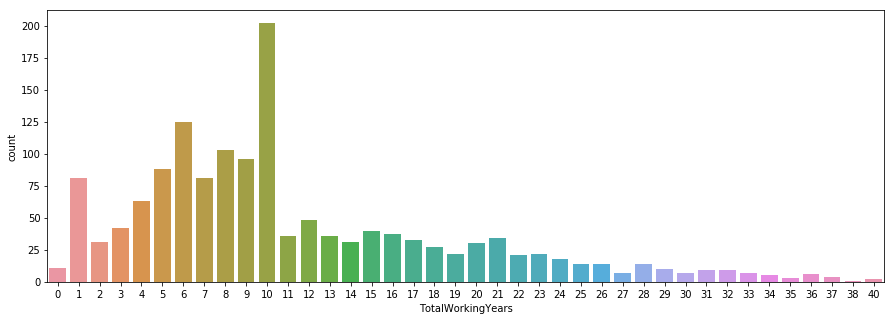

In [172]:
plt.subplots(figsize=(15,5))
sns.countplot(data.TotalWorkingYears)

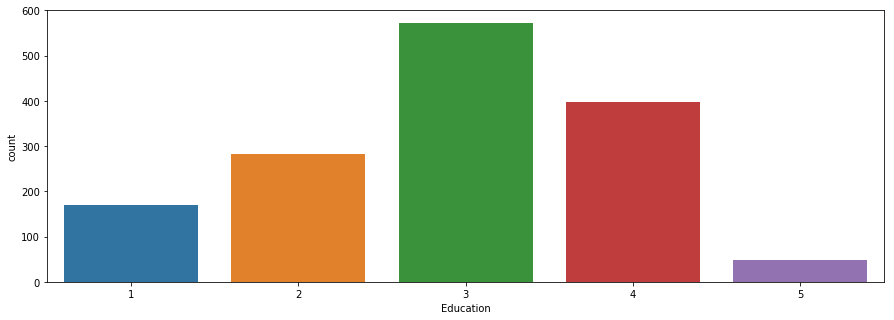

In [173]:
plt.subplots(figsize=(15,5))
sns.countplot(data.Education)

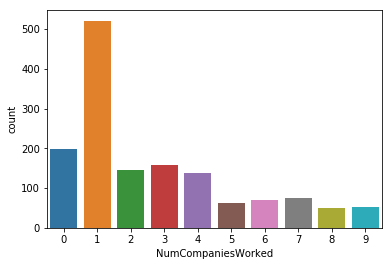

In [174]:
sns.countplot(data.NumCompaniesWorked)

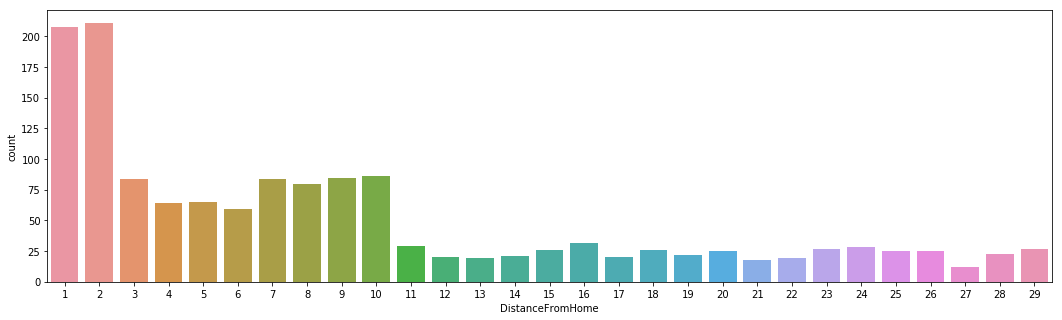

In [175]:
plt.subplots(figsize=(18,5))
sns.countplot(data.DistanceFromHome)

Finding out relation between categorical variables

In [176]:
data.groupby(["Department","Attrition"])["EmployeeNumber"].\
                count()/data.groupby(["Department"])["EmployeeNumber"].count()

Department              Attrition
Human Resources         0            0.809524
                        1            0.190476
Research & Development  0            0.861602
                        1            0.138398
Sales                   0            0.793722
                        1            0.206278
Name: EmployeeNumber, dtype: float64

In [177]:
data.groupby(["BusinessTravel","Attrition"])["EmployeeNumber"].\
                count()/data.groupby(["BusinessTravel"])["EmployeeNumber"].count()

BusinessTravel     Attrition
Non-Travel         0            0.920000
                   1            0.080000
Travel_Frequently  0            0.750903
                   1            0.249097
Travel_Rarely      0            0.850431
                   1            0.149569
Name: EmployeeNumber, dtype: float64

In [178]:
data.groupby(["EducationField","Attrition"])["EmployeeNumber"].\
                count()/data.groupby(["EducationField"])["EmployeeNumber"].count()

EducationField    Attrition
Human Resources   0            0.740741
                  1            0.259259
Life Sciences     0            0.853135
                  1            0.146865
Marketing         0            0.779874
                  1            0.220126
Medical           0            0.864224
                  1            0.135776
Other             0            0.865854
                  1            0.134146
Technical Degree  0            0.757576
                  1            0.242424
Name: EmployeeNumber, dtype: float64

In [179]:
data.groupby(["Gender","Attrition"])["EmployeeNumber"].\
                count()/data.groupby(["Gender"])["EmployeeNumber"].count()

Gender  Attrition
Female  0            0.852041
        1            0.147959
Male    0            0.829932
        1            0.170068
Name: EmployeeNumber, dtype: float64

In [180]:
data.groupby(["MaritalStatus","Attrition"])["EmployeeNumber"].\
                count()/data.groupby(["MaritalStatus"])["EmployeeNumber"].count()

MaritalStatus  Attrition
Divorced       0            0.899083
               1            0.100917
Married        0            0.875186
               1            0.124814
Single         0            0.744681
               1            0.255319
Name: EmployeeNumber, dtype: float64

In [181]:
data.groupby(["Over18","Attrition"])["EmployeeNumber"].\
                count()/data.groupby(["Over18"])["EmployeeNumber"].count()

Over18  Attrition
Y       0            0.838776
        1            0.161224
Name: EmployeeNumber, dtype: float64

In [182]:
data.groupby(["OverTime","Attrition"])["EmployeeNumber"].\
                count()/data.groupby(["OverTime"])["EmployeeNumber"].count()

OverTime  Attrition
No        0            0.895636
          1            0.104364
Yes       0            0.694712
          1            0.305288
Name: EmployeeNumber, dtype: float64

In [183]:
data.groupby(["Gender","MaritalStatus","Attrition"])["EmployeeNumber"].\
                count()/data.groupby(["Gender","MaritalStatus"])["EmployeeNumber"].count()

Gender  MaritalStatus  Attrition
Female  Divorced       0            0.923077
                       1            0.076923
        Married        0            0.886029
                       1            0.113971
        Single         0            0.763819
                       1            0.236181
Male    Divorced       0            0.885714
                       1            0.114286
        Married        0            0.867830
                       1            0.132170
        Single         0            0.730627
                       1            0.269373
Name: EmployeeNumber, dtype: float64

In [184]:
data.groupby(["Department","EducationField","Attrition"])["EmployeeNumber"].\
                count()/data.groupby(["Department","EducationField"])["EmployeeNumber"].count()

Department              EducationField    Attrition
Human Resources         Human Resources   0            0.740741
                                          1            0.259259
                        Life Sciences     0            0.937500
                                          1            0.062500
                        Medical           0            0.846154
                                          1            0.153846
                        Other             0            1.000000
                        Technical Degree  0            0.500000
                                          1            0.500000
Research & Development  Life Sciences     0            0.865909
                                          1            0.134091
                        Medical           0            0.870523
                                          1            0.129477
                        Other             0            0.890625
                                          1         

Now let us create some Seaborn pairplots and set it against the target variable which is our Attrition column to get a feel for how the various features are distributed vis-a-vis employee attrition

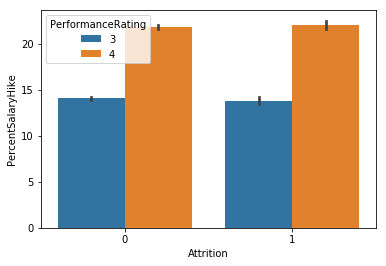

In [185]:
sns.barplot(x='Attrition',y='PercentSalaryHike',data=data,hue='PerformanceRating')

Comparing PercentSalaryHike with attrition and Performance rating there is 50% chance of employee leaving. It is basically not giving any relevant info.

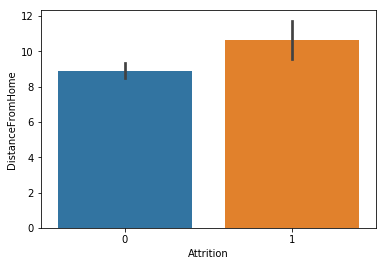

In [186]:
sns.barplot(x="Attrition",y="DistanceFromHome", data=data)

People who are having higher distance from office tends to leave more. Also with OverTime, people are leaving more. So DistanceFromHome and OverTime has a major impact on Attrition

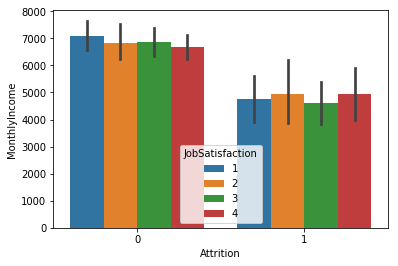

In [187]:
sns.barplot(x="Attrition",y="MonthlyIncome",hue="JobSatisfaction", data=data)

People earning <=5000 with very high job satisfaction tend to leave and people earning >=7000 with lower job satisfaction tends to stay. So, higher income will result in lesser emloyee attrition

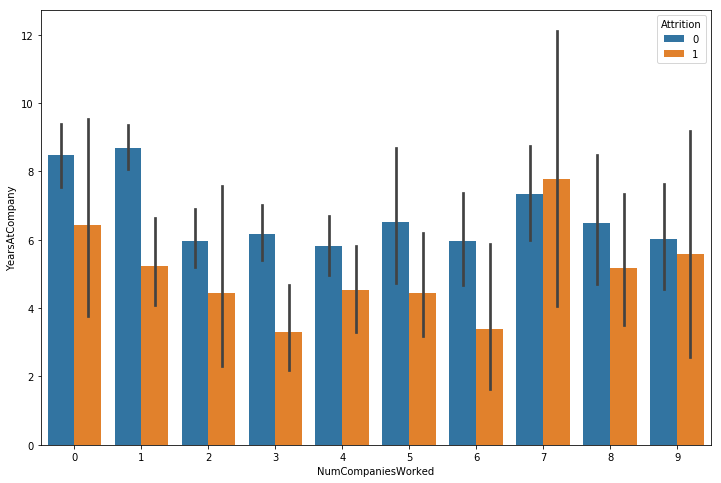

In [188]:
plt.figure(figsize = (12,8))
sns.barplot(x="NumCompaniesWorked",y="YearsAtCompany",hue="Attrition", data=data)

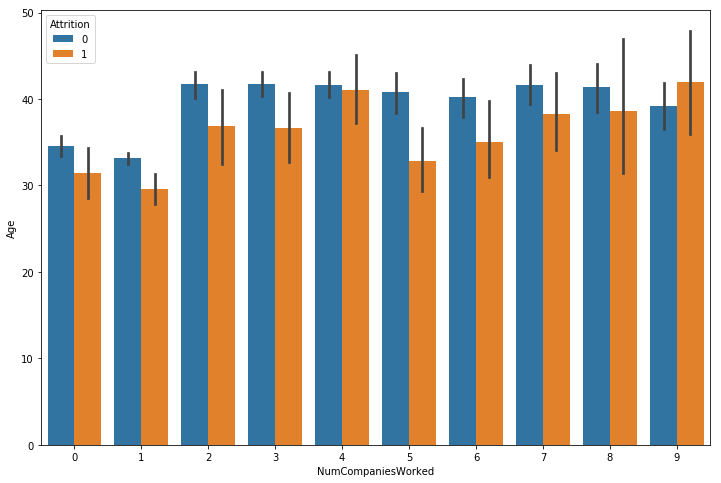

In [189]:
plt.figure(figsize = (12,8))
sns.barplot(x="NumCompaniesWorked",y="Age",hue="Attrition", data=data)

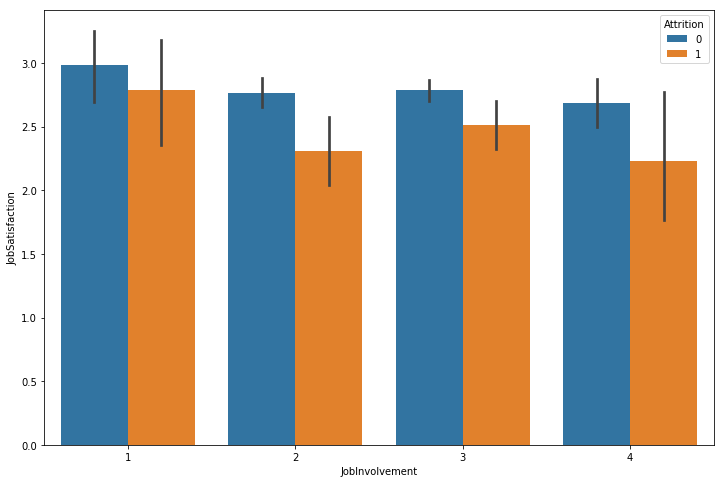

In [190]:
plt.figure(figsize = (12,8))
sns.barplot(x="JobInvolvement",y="JobSatisfaction",hue="Attrition",data=data)

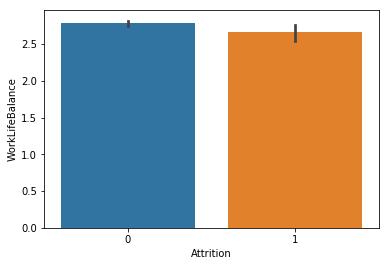

In [191]:
sns.barplot(x="Attrition",y="WorkLifeBalance", data=data)

# 5. Feature Engineering

In [192]:
print(data["Over18"].value_counts())
print(data["EmployeeCount"].value_counts())
print(data["StandardHours"].value_counts())

Y    1470
Name: Over18, dtype: int64
1    1470
Name: EmployeeCount, dtype: int64
80    1470
Name: StandardHours, dtype: int64


In [193]:
#Dropping useless variables
df=data.drop(["EmployeeCount","StandardHours","Over18","EmployeeNumber"],axis=1)

In [194]:
df.shape

(1470, 31)

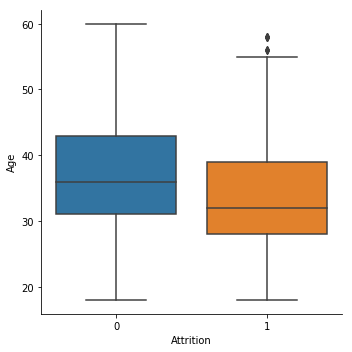

In [195]:
sns.catplot(x = 'Attrition', y ='Age', data = df, kind = 'box')

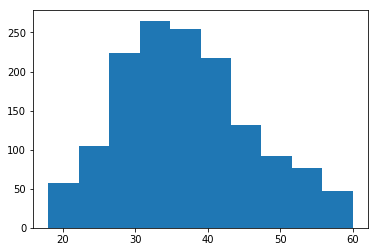

In [196]:
plt.hist(data["Age"])
plt.show()

#Converting Categorical variables to numerical variables

In [197]:
BusinessTravel={'Non-Travel':0, 'Travel_Rarely':1, 'Travel_Frequently':2}
df['BusinessTravel']= df['BusinessTravel'].map(BusinessTravel)

In [198]:
OverTime={'No':0, 'Yes':1}
df['OverTime']= df['OverTime'].map(OverTime)

In [199]:
df=pd.get_dummies(df)

In [200]:
df.head(5)

Age  Attrition  BusinessTravel  DailyRate  DistanceFromHome  Education  \
0   41          1               1       1102                 1          2   
1   49          0               2        279                 8          1   
2   37          1               1       1373                 2          2   
3   33          0               2       1392                 3          4   
4   27          0               1        591                 2          1   

   EnvironmentSatisfaction  HourlyRate  JobInvolvement  JobLevel  ...  \
0                        2          94               3         2  ...   
1                        3          61               2         2  ...   
2                        4          92               2         1  ...   
3                        4          56               3         1  ...   
4                        1          40               3         1  ...   

   JobRole_Laboratory Technician  JobRole_Manager  \
0                              0                0   
1                              0                0   
2                              1                0   
3                              0                0   
4                              1                0   

   JobRole_Manufacturing Director  JobRole_Research Director  \
0                               0                          0   
1                               0                          0   
2                               0                          0   
3                               0                          0   
4                               0                          0   

   JobRole_Research Scientist  JobRole_Sales Executive  \
0                           0                        1   
1                           1                        0   
2                           0                        0   
3                           1                        0   
4                           0                        0   

   JobRole_Sales Representative  MaritalStatus_Divorced  \
0                             0                       0   
1                             0                       0   
2                             0                       0   
3                             0                       0   
4                             0                       0   

   MaritalStatus_Married  MaritalStatus_Single  
0                      0                     1  
1                      1                     0  
2                      0                     1  
3                      1                     0  
4                      1                     0  

[5 rows x 49 columns]

In [201]:
df.head(8).T

0      1     2      3      4      5  \
Age                                   41     49    37     33     27     32   
Attrition                              1      0     1      0      0      0   
BusinessTravel                         1      2     1      2      1      2   
DailyRate                           1102    279  1373   1392    591   1005   
DistanceFromHome                       1      8     2      3      2      2   
Education                              2      1     2      4      1      2   
EnvironmentSatisfaction                2      3     4      4      1      4   
HourlyRate                            94     61    92     56     40     79   
JobInvolvement                         3      2     2      3      3      3   
JobLevel                               2      2     1      1      1      1   
JobSatisfaction                        4      2     3      3      2      4   
MonthlyIncome                       5993   5130  2090   2909   3468   3068   
MonthlyRate                        19479  24907  2396  23159  16632  11864   
NumCompaniesWorked                     8      1     6      1      9      0   
OverTime                               1      0     1      1      0      0   
PercentSalaryHike                     11     23    15     11     12     13   
PerformanceRating                      3      4     3      3      3      3   
RelationshipSatisfaction               1      4     2      3      4      3   
StockOptionLevel                       0      1     0      0      1      0   
TotalWorkingYears                      8     10     7      8      6      8   
TrainingTimesLastYear                  0      3     3      3      3      2   
WorkLifeBalance                        1      3     3      3      3      2   
YearsAtCompany                         6     10     0      8      2      7   
YearsInCurrentRole                     4      7     0      7      2      7   
YearsSinceLastPromotion                0      1     0      3      2      3   
YearsWithCurrManager                   5      7     0      0      2      6   
Department_Human Resources             0      0     0      0      0      0   
Department_Research & Development      0      1     1      1      1      1   
Department_Sales                       1      0     0      0      0      0   
EducationField_Human Resources         0      0     0      0      0      0   
EducationField_Life Sciences           1      1     0      1      0      1   
EducationField_Marketing               0      0     0      0      0      0   
EducationField_Medical                 0      0     0      0      1      0   
EducationField_Other                   0      0     1      0      0      0   
EducationField_Technical Degree        0      0     0      0      0      0   
Gender_Female                          1      0     0      1      0      0   
Gender_Male                            0      1     1      0      1      1   
JobRole_Healthcare Representative      0      0     0      0      0      0   
JobRole_Human Resources                0      0     0      0      0      0   
JobRole_Laboratory Technician          0      0     1      0      1      1   
JobRole_Manager                        0      0     0      0      0      0   
JobRole_Manufacturing Director         0      0     0      0      0      0   
JobRole_Research Director              0      0     0      0      0      0   
JobRole_Research Scientist             0      1     0      1      0      0   
JobRole_Sales Executive                1      0     0      0      0      0   
JobRole_Sales Representative           0      0     0      0      0      0   
MaritalStatus_Divorced                 0      0     0      0      0      0   
MaritalStatus_Married                  0      1     0      1      1      0   
MaritalStatus_Single                   1      0     1      0      0      1   

                                      6      7  
Age                                  59     30  
Attrition                             0 

In [202]:
df = df.drop(['Department_Human Resources','EducationField_Life Sciences','Gender_Female','JobRole_Laboratory Technician','MaritalStatus_Divorced'],axis=1)

In [203]:
df.head().T

0      1     2      3      4
Age                                   41     49    37     33     27
Attrition                              1      0     1      0      0
BusinessTravel                         1      2     1      2      1
DailyRate                           1102    279  1373   1392    591
DistanceFromHome                       1      8     2      3      2
Education                              2      1     2      4      1
EnvironmentSatisfaction                2      3     4      4      1
HourlyRate                            94     61    92     56     40
JobInvolvement                         3      2     2      3      3
JobLevel                               2      2     1      1      1
JobSatisfaction                        4      2     3      3      2
MonthlyIncome                       5993   5130  2090   2909   3468
MonthlyRate                        19479  24907  2396  23159  16632
NumCompaniesWorked                     8      1     6      1      9
OverTime                               1      0     1      1      0
PercentSalaryHike                     11     23    15     11     12
PerformanceRating                      3      4     3      3      3
RelationshipSatisfaction               1      4     2      3      4
StockOptionLevel                       0      1     0      0      1
TotalWorkingYears                      8     10     7      8      6
TrainingTimesLastYear                  0      3     3      3      3
WorkLifeBalance                        1      3     3      3      3
YearsAtCompany                         6     10     0      8      2
YearsInCurrentRole                     4      7     0      7      2
YearsSinceLastPromotion                0      1     0      3      2
YearsWithCurrManager                   5      7     0      0      2
Department_Research & Development      0      1     1      1      1
Department_Sales                       1      0     0      0      0
EducationField_Human Resources         0      0     0      0      0
EducationField_Marketing               0      0     0      0      0
EducationField_Medical                 0      0     0      0      1
EducationField_Other                   0      0     1      0      0
EducationField_Technical Degree        0      0     0      0      0
Gender_Male                            0      1     1      0      1
JobRole_Healthcare Representative      0      0     0      0      0
JobRole_Human Resources                0      0     0      0      0
JobRole_Manager                        0      0     0      0      0
JobRole_Manufacturing Director         0      0     0      0      0
JobRole_Research Director              0      0     0      0      0
JobRole_Research Scientist             0      1     0      1      0
JobRole_Sales Executive                1      0     0      0      0
JobRole_Sales Representative           0      0     0      0      0
MaritalStatus_Married                  0      1     0      1      1
MaritalStatus_Single                   1      0     1      0      0

In [204]:
features = list((df.drop(['Attrition'],axis=1)).columns)
target = 'Attrition'
print(features)
print(target)
print(len(features))

['Age', 'BusinessTravel', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Department_Research & Development', 'Department_Sales', 'EducationField_Human Resources', 'EducationField_Marketing', 'EducationField_Medical', 'EducationField_Other', 'EducationField_Technical Degree', 'Gender_Male', 'JobRole_Healthcare Representative', 'JobRole_Human Resources', 'JobRole_Manager', 'JobRole_Manufacturing Director', 'JobRole_Research Director', 'JobRole_Research Scientist', 'JobRole_Sales Executive', 'JobRole_Sales Representative', 'MaritalStatus_Married', 'MaritalStatus_Single']
Attrition
43


In [205]:
df[features].columns

Index(['Age', 'BusinessTravel', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Human Resources', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'Gender_Male',
       'JobRole_Healthcare Representative', 'JobRole_Human Resources',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobRole_Research Scientist',
       'JobRole_Sales Executive', 

In [206]:
df[target]

0       1
1       0
2       1
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      1
15      0
16      0
17      0
18      0
19      0
20      0
21      1
22      0
23      0
24      1
25      0
26      1
27      0
28      0
29      0
       ..
1440    0
1441    0
1442    1
1443    0
1444    1
1445    0
1446    0
1447    0
1448    0
1449    0
1450    0
1451    0
1452    1
1453    0
1454    0
1455    0
1456    0
1457    0
1458    0
1459    0
1460    0
1461    1
1462    0
1463    0
1464    0
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

Having encoded our categorical columns as well as engineering and created some new features from the numerical data, we can now proceed to merging both dataframes into a final set with which we will train and test our models on.The target in this case is given by the column Attrition which contains categorical variables therefore requires numerical encoding. We numerically encode it by creating a dictionary with the mapping given as 1 : Yes and 0 : No

In [207]:
x_train, x_test, y_train, y_test = train_test_split(df[features],df[target],test_size=0.3,random_state=1)

In [208]:
print("X_train:",len(x_train))
print("X_test:",len(x_test))
print("Y_train:",len(y_train))
print("Y_test:",len(y_test))

X_train: 1029
X_test: 441
Y_train: 1029
Y_test: 441


# 6. Implementing Machine Learning Models

Having performed some exploratory data analysis and simple feature engineering as well as having ensured that all categorical values are encoded, we are now ready to proceed onto building our models.

# (a) LOGISTIC REGRESSION

In [209]:
model = LogisticRegression(solver = 'lbfgs', max_iter = 400)
model.fit(x_train, y_train)
y_predict = model.predict(x_test)
print("Logistic Regression Training Score is",model.score(x_train,y_train))
print("Logistic Regression Testing Score is",model.score(x_test,y_test))

Logistic Regression Training Score is 0.8464528668610302
Logistic Regression Testing Score is 0.8276643990929705


In [210]:
print("Accuracy of Logistic Regression is ",model.score(x_test,y_test)*100,"%")

Accuracy of Logistic Regression is  82.76643990929705 %


In [211]:
for col,value in zip(df[features].columns,model.coef_[0]):
    print(col,"*",value,"+")
print(model.intercept_[0])

Age * -0.015136168914897389 +
BusinessTravel * 0.1022804638802648 +
DailyRate * -0.00026021052338148293 +
DistanceFromHome * 0.03216229370095587 +
Education * 0.03753482238446563 +
EnvironmentSatisfaction * -0.14491686459294242 +
HourlyRate * 0.0065030151812275365 +
JobInvolvement * -0.09303567643821925 +
JobLevel * -0.0069144211853845935 +
JobSatisfaction * -0.0761815552797189 +
MonthlyIncome * -0.00012647246112009264 +
MonthlyRate * 1.4442837806646856e-05 +
NumCompaniesWorked * 0.1488843751812951 +
OverTime * 0.15484676695869895 +
PercentSalaryHike * -0.008282293942763684 +
PerformanceRating * 0.01395433744605734 +
RelationshipSatisfaction * -0.028365394676775138 +
StockOptionLevel * -0.14017614530740205 +
TotalWorkingYears * -0.009741239646745104 +
TrainingTimesLastYear * -0.09380387532274631 +
WorkLifeBalance * -0.07773858492606467 +
YearsAtCompany * 0.050431346155723096 +
YearsInCurrentRole * -0.15221641026710506 +
YearsSinceLastPromotion * 0.251162923695721 +
YearsWithCurrManager

In [212]:
print("Confusion Matrix for logistic Regression")
print(confusion_matrix(y_test, model.predict(x_test)))

Confusion Matrix for logistic Regression
[[360   4]
 [ 72   5]]


In [213]:
print("Classification Report for Logistic Regression")
print(classification_report(y_test, model.predict(x_test)))

Classification Report for Logistic Regression
              precision    recall  f1-score   support

           0       0.83      0.99      0.90       364
           1       0.56      0.06      0.12        77

   micro avg       0.83      0.83      0.83       441
   macro avg       0.69      0.53      0.51       441
weighted avg       0.78      0.83      0.77       441



As observed our Logistic Regression has an accuracy of approx 83% for its predictions and on first glance this might seem to be a pretty good performing model. But,this model has a lower Specificity.

In [214]:
# Compute ROC curve and ROC area for each class
y_score = model.decision_function(df[features])
n_classes =2
fpr = dict()
tpr = dict()
roc_auc = dict()
fpr, tpr, _ = roc_curve(df[target], y_score)
roc_auc = auc(fpr, tpr)

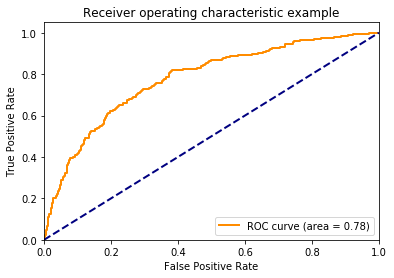

In [215]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw,\
         label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# (b) DECISION TREE

In [216]:
dtc1 = DecisionTreeClassifier(criterion = 'entropy')
dtc1.fit(x_train,y_train)
y_pred_dt = dtc1.predict(x_test)
print("Training Score for Decision Tree is", dtc1.score(x_train,y_train))
print("Testing Score for Decision Tree is", dtc1.score(x_test,y_test))

Training Score for Decision Tree is 1.0
Testing Score for Decision Tree is 0.7619047619047619


In [217]:
print("Accuracy of Decision Tree is",metrics.accuracy_score(y_test, y_pred_dt)*100,"%")

Accuracy of Decision Tree is 76.19047619047619 %


In [218]:
print("Confusion Matrix for Decision Tree")
print(metrics.confusion_matrix(y_test, y_pred_dt))

Confusion Matrix for Decision Tree
[[310  54]
 [ 51  26]]


In [219]:
print("Classification Report for Decision Tree")
print(classification_report(y_test, y_pred_dt))

Classification Report for Decision Tree
              precision    recall  f1-score   support

           0       0.86      0.85      0.86       364
           1       0.33      0.34      0.33        77

   micro avg       0.76      0.76      0.76       441
   macro avg       0.59      0.59      0.59       441
weighted avg       0.77      0.76      0.76       441



In [220]:
#Decision Tree Plot
export_graphviz(dtc1,feature_names=features, out_file="tree.dot",
               filled = True, rounded = True,
               special_characters = True)

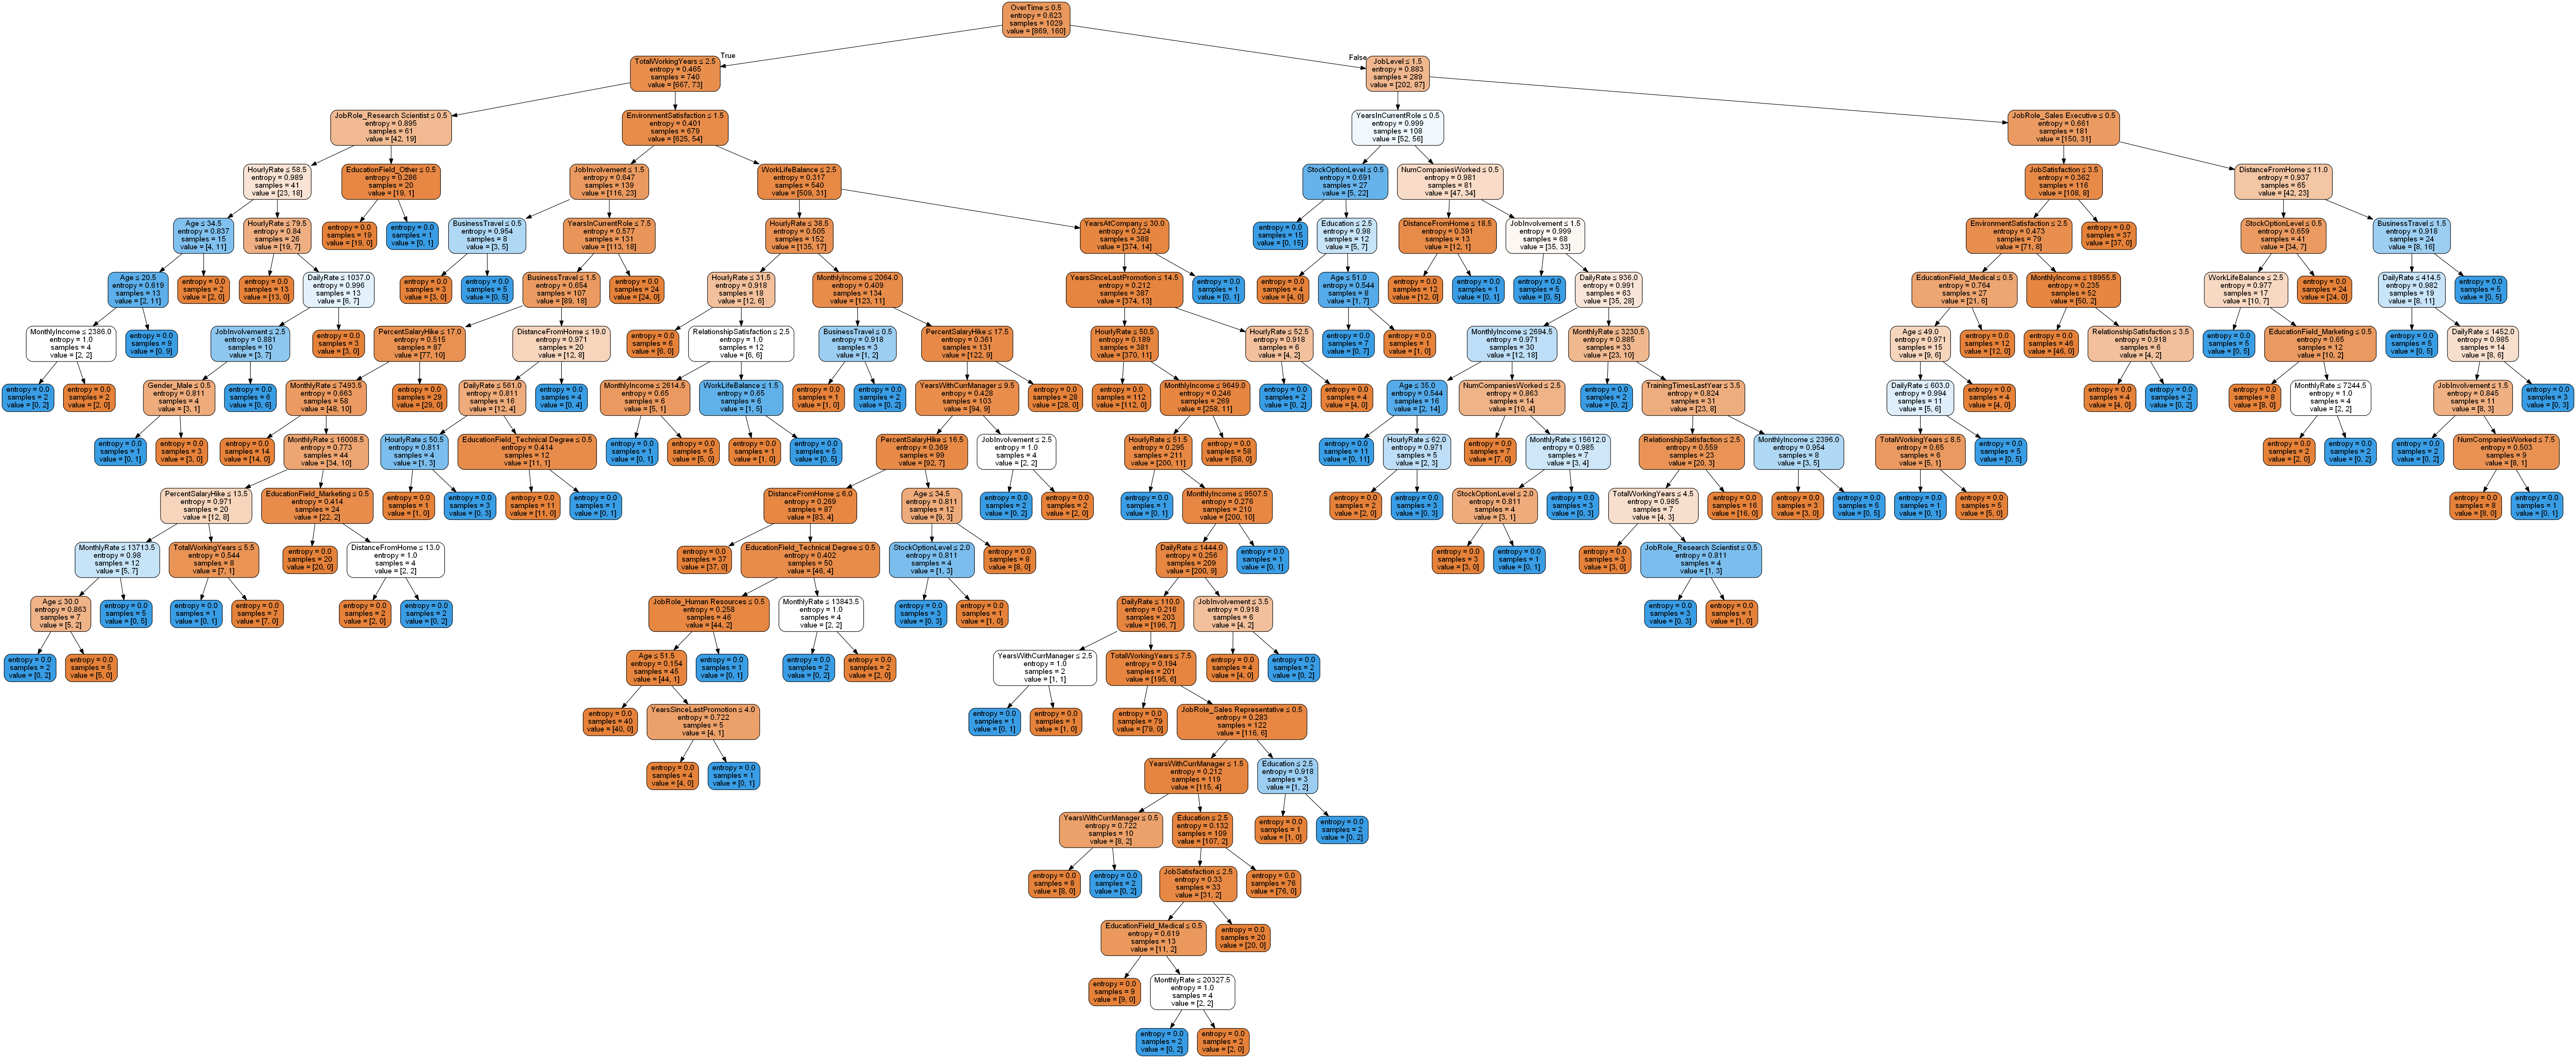

In [221]:
dot_data = StringIO()
export_graphviz(dtc1, feature_names = features, out_file=dot_data,
               filled = True, rounded = True,
               special_characters= True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [222]:
for depth in range(1,20):
    print("depth", depth)
    dtc = DecisionTreeClassifier(criterion = 'entropy', max_depth=depth,class_weight ="balanced")
    dtc1.fit(df[features],df[target])
    print("Training Score", dtc1.score(x_train,y_train))
    print("Testing Score", dtc1.score(x_test,y_test))

depth 1
Training Score 1.0
Testing Score 1.0
depth 2
Training Score 1.0
Testing Score 1.0
depth 3
Training Score 1.0
Testing Score 1.0
depth 4
Training Score 1.0
Testing Score 1.0
depth 5
Training Score 1.0
Testing Score 1.0
depth 6
Training Score 1.0
Testing Score 1.0
depth 7
Training Score 1.0
Testing Score 1.0
depth 8
Training Score 1.0
Testing Score 1.0
depth 9
Training Score 1.0
Testing Score 1.0
depth 10
Training Score 1.0
Testing Score 1.0
depth 11
Training Score 1.0
Testing Score 1.0
depth 12
Training Score 1.0
Testing Score 1.0
depth 13
Training Score 1.0
Testing Score 1.0
depth 14
Training Score 1.0
Testing Score 1.0
depth 15
Training Score 1.0
Testing Score 1.0
depth 16
Training Score 1.0
Testing Score 1.0
depth 17
Training Score 1.0
Testing Score 1.0
depth 18
Training Score 1.0
Testing Score 1.0
depth 19
Training Score 1.0
Testing Score 1.0


In [230]:
#By keeping max depth as 8
dtc1 = DecisionTreeClassifier(criterion = 'entropy', max_depth=8,\
                             class_weight='balanced')
dtc1.fit(x_train,y_train)
new_y_pred = dtc1.predict(x_test)
print("New Training Score for Decision Tree is", dtc1.score(x_train,y_train))
print("New Testing Score for Decision Tree is", dtc1.score(x_test,y_test))

New Training Score for Decision Tree is 0.9105928085519922
New Testing Score for Decision Tree is 0.7732426303854876


In [231]:
print("New Accuracy of Decision Tree",metrics.accuracy_score(y_test, new_y_pred)*100,"%")

New Accuracy of Decision Tree 77.32426303854876 %


In [232]:
print("New Confusion matrix of Decision Tree")
print(metrics.confusion_matrix(y_test, new_y_pred))

New Confusion matrix of Decision Tree
[[303  61]
 [ 39  38]]


In [233]:
print("New Classification Report for Decision Tree")
print(classification_report(y_test, new_y_pred))

New Classification Report for Decision Tree
              precision    recall  f1-score   support

           0       0.89      0.83      0.86       364
           1       0.38      0.49      0.43        77

   micro avg       0.77      0.77      0.77       441
   macro avg       0.63      0.66      0.65       441
weighted avg       0.80      0.77      0.78       441



Our Decision Tree model has an accuracy of approx 77% which is less compared to other models. But the Specificity is higher than the Logistic Regression model.

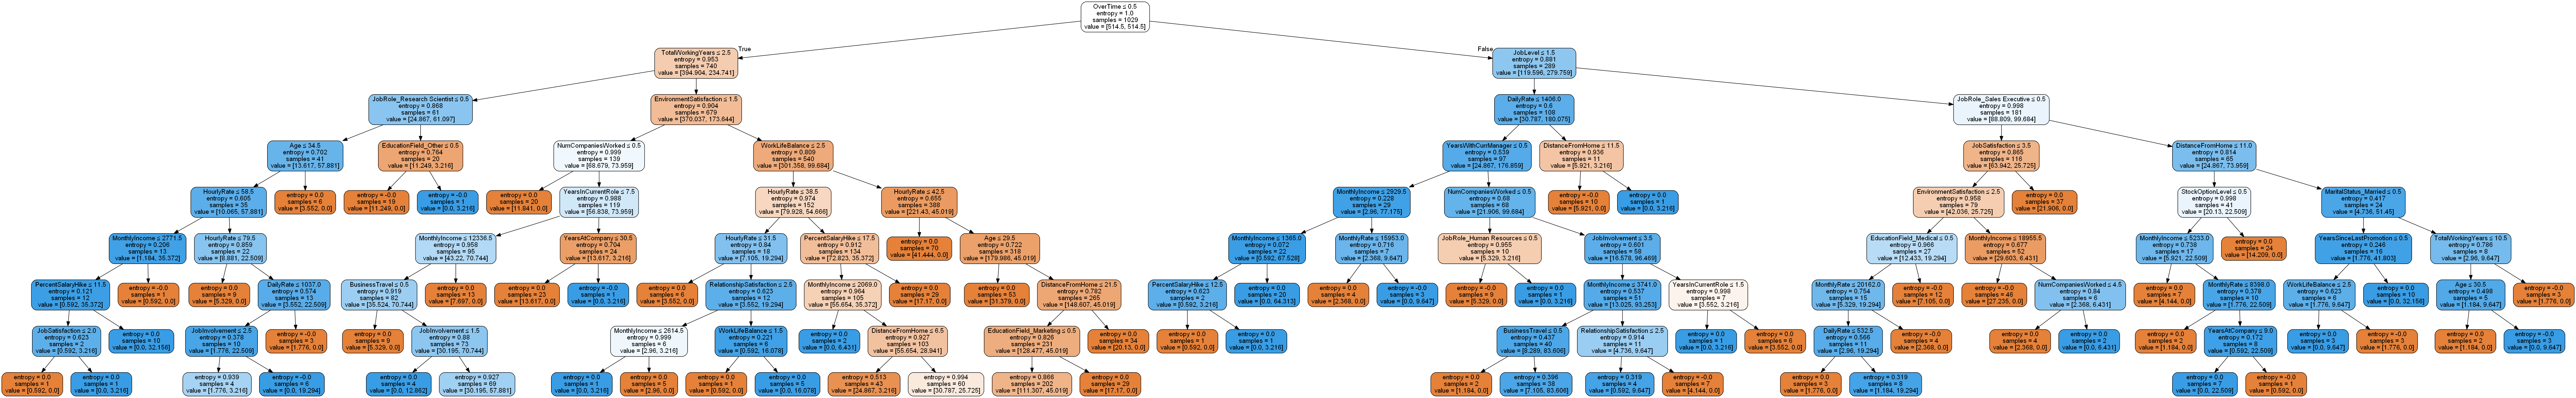

In [234]:
#Pruning of Decision Tree 
dot_data = StringIO()
export_graphviz(dtc1, feature_names = features, out_file=dot_data,
               filled = True, rounded = True,
               special_characters= True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

# (c) RANDOM FOREST

In [235]:
rf = RandomForestClassifier(n_estimators=35,criterion="entropy")
rf.fit(x_train,y_train)
y_pred_rt = rf.predict(x_test)
print("Training Score for Random Forest is",rf.score(x_train,y_train))
print("Testing Score for Random Forest is",rf.score(x_test,y_test))

Training Score for Random Forest is 0.9990281827016521
Testing Score for Random Forest is 0.8412698412698413


In [236]:
print("Accuracy of Random Forest is",rf.score(x_test,y_test)*100,"%")

Accuracy of Random Forest is 84.12698412698413 %


In [237]:
print("Confusion Matrix of Random Forest \n",metrics.confusion_matrix(y_test,y_pred_rt))

Confusion Matrix of Random Forest 
 [[362   2]
 [ 68   9]]


In [238]:
print("Classification report for Random Forest")
print(classification_report(y_test,y_pred_rt))

Classification report for Random Forest
              precision    recall  f1-score   support

           0       0.84      0.99      0.91       364
           1       0.82      0.12      0.20        77

   micro avg       0.84      0.84      0.84       441
   macro avg       0.83      0.56      0.56       441
weighted avg       0.84      0.84      0.79       441



In [239]:
#Handling Class Imbalance
majority_class = df[df['Attrition']==0]
minority_class = df[df['Attrition']==1]
print(len(majority_class))
print(len(minority_class))

1233
237


In [240]:
minority_class_upsampled = resample(minority_class,replace=True,n_samples=1233,random_state=1)

In [241]:
df_balanced = pd.concat([majority_class,minority_class_upsampled])

In [242]:
df_balanced['Attrition'].value_counts()

1    1233
0    1233
Name: Attrition, dtype: int64

In [250]:
x_train1,x_test1,y_train1,y_test1 = train_test_split(df_balanced[features],df_balanced[target],test_size=0.3,random_state = 1)

In [251]:
print('New Random Forest')
rf.fit(x_train1,y_train1)

New Random Forest


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=35, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [252]:
y_test1.value_counts()

1    385
0    355
Name: Attrition, dtype: int64

In [256]:
y_pred_rf_new = rf.predict(x_test1)
print("New Training Score for Random Forest is",rf.score(x_train1,y_train1))
print("New Testing Score for Random Forest is",rf.score(x_test1,y_test1))

New Training Score for Random Forest is 0.9994206257242179
New Testing Score for Random Forest is 0.9635135135135136


In [257]:
print("New Accuracy of Random Forest is",rf.score(x_test1,y_test1)*100,"%")

New Accuracy of Random Forest is 96.35135135135135 %


In [259]:
print("New Confusion Matrix of Random Forest \n",metrics.confusion_matrix(y_test1,y_pred_rf_new))

New Confusion Matrix of Random Forest 
 [[335  20]
 [  7 378]]


In [260]:
print("New Classification report for Random Forest")
print(classification_report(y_test1,y_pred_rf_new))

New Classification report for Random Forest
              precision    recall  f1-score   support

           0       0.98      0.94      0.96       355
           1       0.95      0.98      0.97       385

   micro avg       0.96      0.96      0.96       740
   macro avg       0.96      0.96      0.96       740
weighted avg       0.96      0.96      0.96       740



We can really observe that Accuracy of Random Forest is the highest amongst the three models which of approx 96%. This has the highest Specificity. Truly this is the best performing model.

# Feature Importance based on Random Forest Model

In [261]:
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = features,
                                    columns=['importance']).sort_values('importance',ascending=False)
feature_importances

importance
MonthlyIncome                        0.086691
OverTime                             0.062569
DailyRate                            0.056783
Age                                  0.053284
MonthlyRate                          0.048900
HourlyRate                           0.045723
DistanceFromHome                     0.044619
TotalWorkingYears                    0.041859
YearsInCurrentRole                   0.038237
YearsAtCompany                       0.036280
PercentSalaryHike                    0.031353
NumCompaniesWorked                   0.031237
EnvironmentSatisfaction              0.031020
StockOptionLevel                     0.030360
YearsWithCurrManager                 0.027521
YearsSinceLastPromotion              0.027385
RelationshipSatisfaction             0.024673
JobLevel                             0.024610
JobInvolvement                       0.023920
JobSatisfaction                      0.023779
TrainingTimesLastYear                0.023726
WorkLifeBalance                      0.022054
BusinessTravel                       0.020209
MaritalStatus_Single                 0.017367
Education                            0.017300
Gender_Male                          0.009716
EducationField_Technical Degree      0.008863
Department_Sales                     0.008481
JobRole_Sales Executive              0.007834
MaritalStatus_Married                0.007811
JobRole_Research Director            0.007551
JobRole_Research Scientist           0.007114
JobRole_Sales Representative         0.007097
EducationField_Medical               0.006974
Department_Research & Development    0.006545
EducationField_Marketing             0.006363
PerformanceRating                    0.005855
JobRole_Manufacturing Director       0.004219
EducationField_Other                 0.003892
JobRole_Manager                      0.003445
JobRole_Healthcare Representative    0.002821
JobRole_Human Resources              0.002390
EducationField_Human Resources       0.001567

Clearly some features like Monthly income, Overtime, Age, Monthly Rate, Distance From home has a higher impact on the attrition of the employees. People having a good salary are more likely to stay in the organization. People having higher age, or staying near to offices are more likely to stay. People doing less overtime are more likely to stay in the organization.

Based on the model, we can conclude that when any new employees joins the organization, our model will provide 96% accurate results that the person is going to churn or not.